In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'labels.csv', 'sample_submission.csv', 'train']


In [2]:
%ls '../input/'
labels=pd.read_csv('../input/labels.csv')
test=pd.read_csv('../input/sample_submission.csv')

labels.csv  sample_submission.csv  test/  train/


In [3]:
path=labels['id']
target1=labels['breed']
testpath=test['id']

In [4]:
target=target1.append(target1)
target=target.append(target)

In [5]:
from keras.preprocessing.image import load_img,img_to_array
image_train1=[]
for x in path:
    y=cv2.imread('../input/train/'+x+'.jpg')
    y=cv2.resize(y,(32,32))
    y=cv2.GaussianBlur(y,(5,5),0)
    y=cv2.cvtColor(y, cv2.COLOR_RGB2GRAY)
    image_train1.append(img_to_array(y))

Using TensorFlow backend.


In [6]:
image_test=[]
for x in testpath:
    y=cv2.imread('../input/test/'+x+'.jpg')
    y=cv2.resize(y,(32,32))
    y=cv2.GaussianBlur(y,(5,5),0)
    y=cv2.cvtColor(y, cv2.COLOR_RGB2GRAY)
    image_test.append(img_to_array(y))

In [7]:
image_train=np.array(image_train1)
image_test=np.array(image_test)

In [8]:
image_train.shape

(10222, 32, 32, 1)

In [9]:
image_train=np.append(image_train,image_train,0)
image_train=np.append(image_train,image_train,0)

In [10]:
image_train.shape

(40888, 32, 32, 1)

In [11]:
target_all=pd.get_dummies(target,sparse=True)
target=np.asarray(target_all)

In [12]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,AvgPool2D
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ztrain,ztest=tts(image_train,target,train_size=0.8)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
from keras.models import Sequential
from keras.layers import MaxPool2D,AvgPool2D
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='tanh',input_shape=(32,32,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.05))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(30,30,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(500, activation = "sigmoid"))
model.add(Dropout(0.05))
model.add(Dense(250, activation = "relu"))
model.add(Dropout(0.05))
model.add(Dense(120, activation = "softmax"))
from keras.preprocessing.image import ImageDataGenerator
data=ImageDataGenerator(height_shift_range=0.1,width_shift_range=0.1,rotation_range=0.1,zoom_range=0.1)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [17]:
history=model.fit_generator(data.flow(xtrain,ztrain,batch_size=1000),steps_per_epoch=1000,epochs=10,
                            validation_data=[xtest,ztest])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1000/1000 [==============================] - 210s 210ms/step - loss: 3.7750 - acc: 0.1553 - val_loss: 2.5305 - val_acc: 0.4233
Epoch 2/10
1000/1000 [==============================] - 197s 197ms/step - loss: 2.2453 - acc: 0.4536 - val_loss: 1.1243 - val_acc: 0.7600
Epoch 3/10
1000/1000 [==============================] - 195s 195ms/step - loss: 1.4418 - acc: 0.6290 - val_loss: 0.5186 - val_acc: 0.8981
Epoch 4/10
1000/1000 [==============================] - 194s 194ms/step - loss: 1.0619 - acc: 0.7164 - val_loss: 0.3194 - val_acc: 0.9397
Epoch 5/10
1000/1000 [==============================] - 192s 192ms/step - loss: 0.8572 - acc: 0.7663 - val_loss: 0.2111 - val_acc: 0.9634
Epoch 6/10
1000/1000 [==============================] - 196s 196ms/step - loss: 0.7295 - acc: 0.7977 - val_loss: 0.1623 - val_acc: 0.9713
Epoch 7/10
1000/1000 [==============================] - 194s 194ms/step - loss: 0.6436 - acc: 0.8193 - val_loss: 0.1508 - va

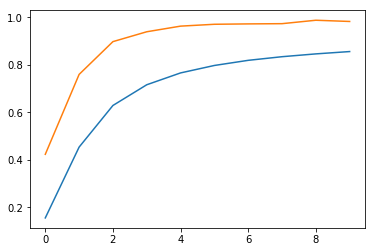

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

In [21]:
result=model.predict(image_test)
result_data=pd.DataFrame(result,columns=target_all.columns.values,index=testpath)

In [ ]:
result_data.to_csv('result_improved_3.csv')

In [ ]:
result_data